In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data1 = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country', 'Clicked on Ad']]

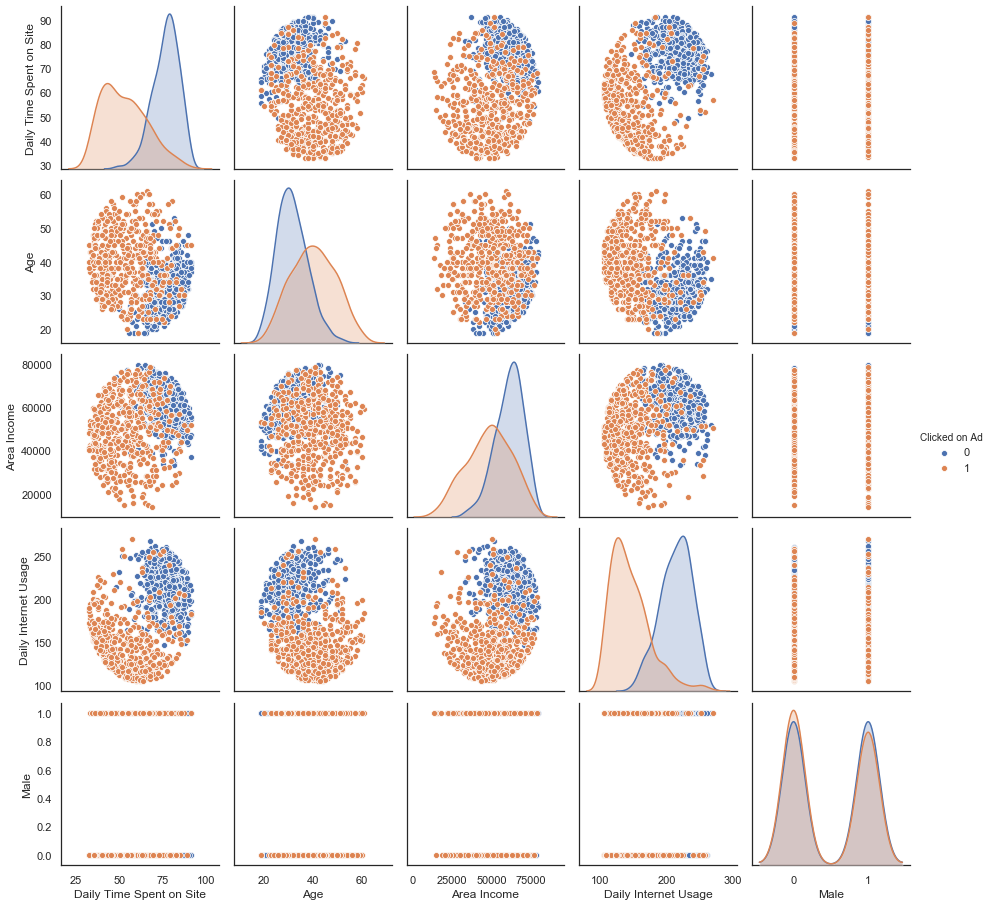

In [4]:
sns.pairplot(data1,hue='Clicked on Ad')

In [5]:
data1.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0


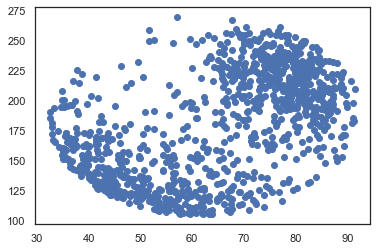

In [6]:
plt.scatter(data1['Daily Time Spent on Site'], data1['Daily Internet Usage'])

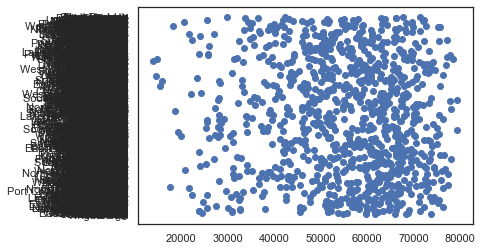

In [7]:
plt.scatter(data1['Area Income'], data1['City'])

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
data1['City'] = le.fit_transform(data1['City'])
data1['Country'] = le.fit_transform(data1['Country'])

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [11]:
X = data1.iloc[:,0:6]
y = data1.iloc[:,7]

In [12]:
X = ss.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train , y_test = tts(X,y, random_state = 101 , test_size = 0.33)

In [14]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((670, 6), (330, 6), (670,), (330,))

In [15]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [16]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=96)

In [17]:
#train the model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [19]:
#score on training data
print(clf.score(X_train, y_train))
#score on test data
print(clf.score(X_test, y_test))

1.0
0.9545454545454546


In [39]:
#feature importance against each variable
pd.Series(clf.feature_importances_)

0    0.304074
1    0.094158
2    0.119927
3    0.452645
4    0.025524
5    0.003673
dtype: float64

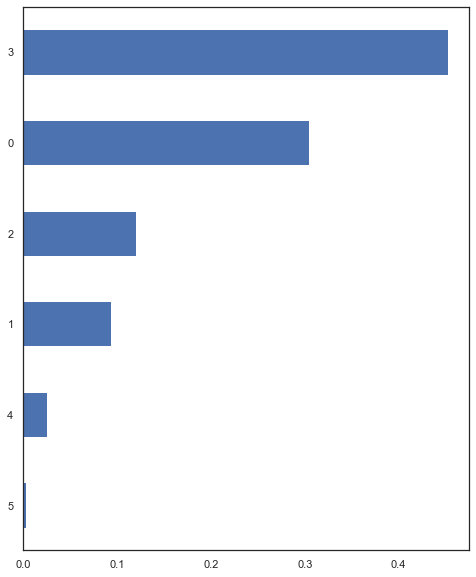

In [42]:
feat_imps = pd.Series(clf.feature_importances_)
feat_imps.nsmallest(30).plot(kind='barh', figsize=(8,10))

In [46]:
#creating a random forest instance
clf_x = RandomForestClassifier(random_state=96,n_estimators = 200, max_depth=3,min_samples_split=25,max_features=4)

In [47]:
clf_x.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [64]:
#score on training data
print(clf_x.score(X_train, y_train))
#score on test data
print(clf_x.score(X_test, y_test))

0.9746268656716418
0.9545454545454546


In [53]:
y_pred = clf_x.predict(X_test)

In [62]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 15


In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
conf_matrix=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [61]:
accuracy

0.9545454545454546

In [58]:
cnf_matrix = conf_matrix.copy()

the recall for this model is : 0.9433962264150944
TP 150
TN 165
FP 6
FN 9


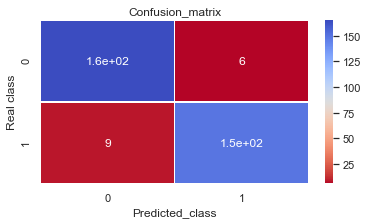


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       171
           1       0.96      0.94      0.95       159

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [60]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))
